In [1]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

In [3]:
path_to_complete_annotation = "second_annotation/control_manahil.csv"
df_complete = pd.read_csv(path_to_complete_annotation, index_col = 'Unnamed: 0')
output_df = df_complete
df_complete

,id_column,annotate_text,label,annotated_at
0,8592,<b>Raw:</b> Sa twitter ako nag ccomplain hahah...,some_english,2022-12-09 22:55:27
1,16735,<b>Raw:</b> John\nPallelai bedolwalk no49.miss...,NaN,2022-12-09 22:55:31
2,6144,<b>Raw:</b> Nov. Or December ko mapuli...proba...,code-switched,2022-12-09 22:55:46
3,14511,<b>Raw:</b> Carlos Alcaraz reinforced his stat...,full_standard_english,2022-12-09 22:55:55
4,18167,<b>Raw:</b> John\nPallelai bedokwalk no49missk...,NaN,2022-12-09 22:55:57
...,...,...,...,...
95,23965,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,NaN,2022-12-09 23:08:32
96,15870,<b>Raw:</b> Choosy daw ako..😂\nDapat naman tal...,code-switched,2022-12-09 23:08:38
97,12547,<b>Raw:</b> It’s a wrap for Syawal Day 5 🖤🖤🖤\n...,NaN,2022-12-09 23:08:40
98,14276,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,NaN,2022-12-09 23:08:42


In [16]:
filtered = output_df[(output_df['label_1'] != None) & (output_df['label_2'] != None) & (output_df['label_1'].notna())& (output_df['label_2'].notna())]
filtered
sklearn.metrics.cohen_kappa_score(filtered.label_1, filtered.label_2)

0.6871214116407691

In [4]:
path_to_test_annotation = "control_tests/control_maimuna.csv"
df_test = pd.read_csv(path_to_test_annotation, index_col = "Unnamed: 0")
df_test

,id_column,annotate_text,label,annotated_at
0,21058,<b>Raw:</b> I communicate sa migo nya Kay I ju...,code-switched,2022-12-11 17:05:12
1,23770,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,code-switched,2022-12-11 17:05:36
2,13072,<b>Raw:</b> i shld really learn my lesson lmao...,non_standard_english,2022-12-11 17:06:32
3,8899,<b>Raw:</b> Thanks for the awesome cards for b...,not-syntactic_standard_english,2022-12-11 17:07:06
4,7028,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,non_standard_english,2022-12-11 17:08:02
...,...,...,...,...
95,19785,<b>Raw:</b> gohleeping744@gmail.com https://t....,NaN,2022-12-11 17:24:44
96,23521,<b>Raw:</b> Daw BGC ang SG hahaha times 5 lang...,some_english,2022-12-11 17:24:49
97,10581,<b>Raw:</b> Pahit kopi dia kan. Hope terus awa...,some_english,2022-12-11 17:24:55
98,5573,<b>Raw:</b> We are here to build rocket = @BAY...,non_standard_english,2022-12-11 17:25:08


In [5]:
df_joined = df_test.merge(df_complete, how = 'left', on = 'id_column')
df_joined

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
0,21058,<b>Raw:</b> I communicate sa migo nya Kay I ju...,code-switched,2022-12-11 17:05:12,<b>Raw:</b> I communicate sa migo nya Kay I ju...,code-switched,2022-12-09 22:56:08
1,23770,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,code-switched,2022-12-11 17:05:36,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,NaN,2022-12-09 23:05:04
2,13072,<b>Raw:</b> i shld really learn my lesson lmao...,non_standard_english,2022-12-11 17:06:32,<b>Raw:</b> i shld really learn my lesson lmao...,non_standard_english,2022-12-09 22:59:51
3,8899,<b>Raw:</b> Thanks for the awesome cards for b...,not-syntactic_standard_english,2022-12-11 17:07:06,<b>Raw:</b> Thanks for the awesome cards for b...,non_standard_english,2022-12-09 23:03:41
4,7028,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,non_standard_english,2022-12-11 17:08:02,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,code-switched,2022-12-09 23:05:23
...,...,...,...,...,...,...,...
95,19785,<b>Raw:</b> gohleeping744@gmail.com https://t....,NaN,2022-12-11 17:24:44,<b>Raw:</b> gohleeping744@gmail.com https://t....,NaN,2022-12-09 23:01:17
96,23521,<b>Raw:</b> Daw BGC ang SG hahaha times 5 lang...,some_english,2022-12-11 17:24:49,<b>Raw:</b> Daw BGC ang SG hahaha times 5 lang...,some_english,2022-12-09 23:03:24
97,10581,<b>Raw:</b> Pahit kopi dia kan. Hope terus awa...,some_english,2022-12-11 17:24:55,<b>Raw:</b> Pahit kopi dia kan. Hope terus awa...,code-switched,2022-12-09 23:00:23
98,5573,<b>Raw:</b> We are here to build rocket = @BAY...,non_standard_english,2022-12-11 17:25:08,<b>Raw:</b> We are here to build rocket = @BAY...,non_standard_english,2022-12-09 22:59:48


In [6]:
df_joined = df_joined.fillna('none')

label_order = ['full_standard_english', 'not-syntactic_standard_english', 'non_standard_english', 'code-switched', 'some_english', 'not_english', 'none']
df_confusion = pd.crosstab(df_joined.label_x, df_joined.label_y).reindex(label_order)[label_order]
df_confusion = df_confusion[label_order].fillna(0)
df_confusion

label_y,full_standard_english,not-syntactic_standard_english,non_standard_english,code-switched,some_english,not_english,none
label_x,,,,,,,
full_standard_english,1.0,0.0,0.0,0.0,0.0,0.0,0.0
not-syntactic_standard_english,2.0,6.0,3.0,0.0,0.0,0.0,1.0
non_standard_english,0.0,0.0,13.0,1.0,0.0,0.0,1.0
code-switched,0.0,0.0,1.0,7.0,0.0,1.0,21.0
some_english,0.0,0.0,0.0,6.0,4.0,0.0,0.0
not_english,0.0,0.0,0.0,0.0,0.0,0.0,0.0
none,3.0,7.0,5.0,2.0,1.0,0.0,14.0


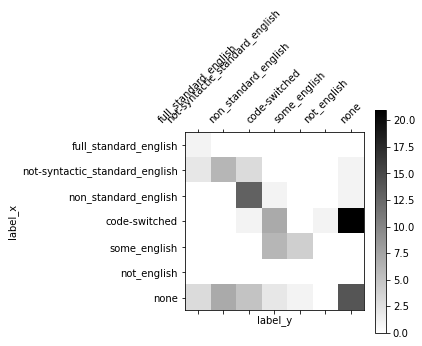

In [7]:
plot_confusion_matrix(df_confusion)

In [10]:
df = df_joined[(df_joined['label_x'] != 'some_english') & (df_joined['label_y'] != 'none')]
sklearn.metrics.cohen_kappa_score(df.label_x, df.label_y)
# df

0.2943289710033359

In [11]:
df_joined[df_joined['label_x'] != df_joined['label_y']]

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
1,23770,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,code-switched,2022-12-11 17:05:36,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,none,2022-12-09 23:05:04
3,8899,<b>Raw:</b> Thanks for the awesome cards for b...,not-syntactic_standard_english,2022-12-11 17:07:06,<b>Raw:</b> Thanks for the awesome cards for b...,non_standard_english,2022-12-09 23:03:41
4,7028,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,non_standard_english,2022-12-11 17:08:02,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,code-switched,2022-12-09 23:05:23
5,14448,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,non_standard_english,2022-12-11 17:08:40,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,none,2022-12-09 22:56:00
7,17045,<b>Raw:</b> TTB doing a massive giveaway. If y...,not-syntactic_standard_english,2022-12-11 17:09:40,<b>Raw:</b> TTB doing a massive giveaway. If y...,non_standard_english,2022-12-09 22:59:33
9,1994,<b>Raw:</b> Yup it is. You gonna suprise how m...,code-switched,2022-12-11 17:11:07,<b>Raw:</b> Yup it is. You gonna suprise how m...,non_standard_english,2022-12-09 23:01:45
11,15650,<b>Raw:</b> Episode 18 of Back Passt With Ras ...,not-syntactic_standard_english,2022-12-11 17:11:42,<b>Raw:</b> Episode 18 of Back Passt With Ras ...,none,2022-12-09 23:05:02
13,12072,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,code-switched,2022-12-11 17:12:25,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,none,2022-12-09 22:58:45
15,2648,<b>Raw:</b> Dasig maguba ang slides nga leath...,some_english,2022-12-11 17:12:54,<b>Raw:</b> Dasig maguba ang slides nga leath...,code-switched,2022-12-09 22:58:01
17,5113,<b>Raw:</b> “Like the rain that falls when it’...,none,2022-12-11 17:13:17,<b>Raw:</b> “Like the rain that falls when it’...,code-switched,2022-12-09 23:01:41


In [32]:
df = df_joined[(df_joined['label_x'] != 'none') & (df_joined['label_y'] == 'none')]
df
# df_joined[df_joined.id_column == 8412].iloc[0].annotate_text_x

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
1,23770,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,code-switched,2022-12-11 17:05:36,<b>Raw:</b> John\nPallelai bedokwalk no49.misl...,none,2022-12-09 23:05:04
5,14448,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,non_standard_english,2022-12-11 17:08:40,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,none,2022-12-09 22:56:00
11,15650,<b>Raw:</b> Episode 18 of Back Passt With Ras ...,not-syntactic_standard_english,2022-12-11 17:11:42,<b>Raw:</b> Episode 18 of Back Passt With Ras ...,none,2022-12-09 23:05:02
13,12072,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,code-switched,2022-12-11 17:12:25,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,none,2022-12-09 22:58:45
20,19424,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,code-switched,2022-12-11 17:14:08,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,none,2022-12-09 23:04:25
22,18167,<b>Raw:</b> John\nPallelai bedokwalk no49missk...,code-switched,2022-12-11 17:14:30,<b>Raw:</b> John\nPallelai bedokwalk no49missk...,none,2022-12-09 22:55:57
28,16436,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,code-switched,2022-12-11 17:15:17,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,none,2022-12-09 23:01:08
30,11254,<b>Raw:</b> John\nPallelai bedokwalk no 49 mis...,code-switched,2022-12-11 17:16:40,<b>Raw:</b> John\nPallelai bedokwalk no 49 mis...,none,2022-12-09 22:57:01
39,14028,<b>Raw:</b> John.\nPallelai bedokwalk no49.mis...,code-switched,2022-12-11 17:17:45,<b>Raw:</b> John.\nPallelai bedokwalk no49.mis...,none,2022-12-09 23:04:48
40,23756,<b>Raw:</b> Pallelai bedokwalk no 49.misslohah...,code-switched,2022-12-11 17:17:48,<b>Raw:</b> Pallelai bedokwalk no 49.misslohah...,none,2022-12-09 23:03:26


In [33]:
df_joined[df_joined.id_column == 15650].iloc[0].annotate_text_x

'<b>Raw:</b> Episode 18 of Back Passt With Ras :A special double feature in anticipation for our trip up to Terengganu!One of our captains,Darren &amp; coach,Syed Azmir talk what everyone can look forward to when team travels up North.Tune into our livestream show, 8th June,7.30pm on our Facebook<br><b>Clean</b>: episode 18 of back passt with ras a special double feature in anticipation for our trip up to terengganu one of our captainsdarren and coachsyed azmir talk what everyone can look forward to when team travels up north tune into our livestream show 8th june7 30pm on our facebook'

In [150]:
df_joined[(df_joined['label_x'] != 'none') & (df_joined['label_y'] == 'none')]


,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
3,1460,<b>Raw:</b> PineCone #BL602 connected to SBC f...,full_standard_english,10/12/2022 15:43,<b>Raw:</b> PineCone #BL602 connected to SBC f...,none,2022-12-09 23:06:01
6,4384,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,not-syntactic_standard_english,10/12/2022 15:45,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,none,2022-12-09 23:02:15
8,19785,<b>Raw:</b> gohleeping744@gmail.com https://t....,non_standard_english,10/12/2022 15:47,<b>Raw:</b> gohleeping744@gmail.com https://t....,none,2022-12-09 23:01:17
14,16436,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,non_standard_english,10/12/2022 15:49,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,none,2022-12-09 23:01:08
16,13508,<b>Raw:</b> Episode 15 of Back Passt With Ras ...,full_standard_english,10/12/2022 15:56,<b>Raw:</b> Episode 15 of Back Passt With Ras ...,none,2022-12-09 22:56:26
18,14276,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,not-syntactic_standard_english,10/12/2022 15:58,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,none,2022-12-09 23:08:42
22,21662,<b>Raw:</b> StarMagicBeyondTheStars happening ...,not-syntactic_standard_english,10/12/2022 16:01,<b>Raw:</b> StarMagicBeyondTheStars happening ...,none,2022-12-09 23:00:02
26,19417,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,non_standard_english,10/12/2022 16:02,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,none,2022-12-09 23:01:47
27,16735,<b>Raw:</b> John\nPallelai bedolwalk no49.miss...,not-syntactic_standard_english,10/12/2022 16:02,<b>Raw:</b> John\nPallelai bedolwalk no49.miss...,none,2022-12-09 22:55:31
28,19817,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,non_standard_english,10/12/2022 16:02,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,none,2022-12-09 23:04:23


In [152]:
df_joined[df_joined.id_column == 14597].iloc[0].annotate_text_x

'<b>Raw:</b> This one strutting the grounds.\n#niece #toddler #walking \n\n#mylifeisfull \n28.05.2022 day 148 @ Singapore / Singapura / 新加坡 / சிங்கப்பூர் https://t.co/uulNnXlb9H<br><b>Clean</b>: this one strutting the grounds 28 05 2022 day 148 singapore singapura'